#### Import all the libraries

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [6]:
os.chdir('C:\\Data Science\\Classes\\33rd Class ( 6th APRIL)')

#### Load Data Set 

In [10]:
data = pd.read_csv('movie_metadata.csv')
display(data)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,49,12,7.1,49.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1,87,2,318,Daphne Zuniga,637,49,Comedy|Drama,...,6,English,Canada,49,49,2013,470,7.7,49.00,84
5039,Color,49,43,43,49,319,Valorie Curry,841,49,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,49,49,593,7.5,16.00,32000
5040,Color,Benjamin Roberds,13,76,0,0,Maxwell Moody,0,49,Drama|Horror|Thriller,...,3,English,USA,49,1400,2013,0,6.3,49.00,16
5041,Color,Daniel Hsia,14,100,0,489,Daniel Henney,946,10443,Comedy|Drama|Romance,...,9,English,USA,PG-13,49,2012,719,6.3,2.35,660


#### Display the shape 

In [12]:
print(data.shape)

(5043, 28)


#### Group By based on County

In [14]:
print(data.groupby('country').size())

country
49                         5
Afghanistan                1
Argentina                  4
Aruba                      1
Australia                 55
                        ... 
Turkey                     1
UK                       448
USA                     3807
United Arab Emirates       1
West Germany               3
Length: 66, dtype: int64


#### Group By based on language

In [16]:
print(data.groupby('language').size())

language
49              12
Aboriginal       2
Arabic           5
Aramaic          1
Bosnian          1
Cantonese       11
Chinese          3
Czech            1
Danish           5
Dari             2
Dutch            4
Dzongkha         1
English       4704
Filipino         1
French          73
German          19
Greek            1
Hebrew           5
Hindi           28
Hungarian        1
Icelandic        2
Indonesian       2
Italian         11
Japanese        18
Kannada          1
Kazakh           1
Korean           8
Mandarin        26
Maya             1
Mongolian        1
Norwegian        4
Panjabi          1
Persian          4
Polish           4
Portuguese       8
Romanian         2
Russian         11
Slovenian        1
Spanish         40
Swahili          1
Swedish          5
Tamil            1
Telugu           1
Thai             3
Urdu             1
Vietnamese       1
Zulu             2
dtype: int64


#### Display all the columns names

In [18]:
display(data.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

#### Display Two Columns

In [ ]:
data[['director_name','director_facebook_likes']]

#### Group By based on Language

In [ ]:
newdata = data.iloc[:,4:6]
display(newdata)

#### Create the model

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,n_init=10)
kmeans.fit(newdata)
print(kmeans)

KMeans(n_clusters=5, n_init=10)


#### Disply the cluster centers

In [34]:
display (kmeans.cluster_centers_)

array([[  151.29382199,   420.67350785],
       [12490.38461538,   605.93269231],
       [  210.77011494, 11126.43678161],
       [17545.45454545, 14545.45454545],
       [17621.21212121,   596.10606061]])

#### Cluster details

In [30]:
cluster = pd.concat([data,pd.DataFrame(kmeans.labels_,columns=['Cluster Number'])],axis=1)
cluster

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Cluster Number
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000,0
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000,0
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000,3
4,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,12,7.1,49.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1,87,2,318,Daphne Zuniga,637,49,Comedy|Drama,...,English,Canada,49,49,2013,470,7.7,49.00,84,0
5039,Color,49,43,43,49,319,Valorie Curry,841,49,Crime|Drama|Mystery|Thriller,...,English,USA,TV-14,49,49,593,7.5,16.00,32000,0
5040,Color,Benjamin Roberds,13,76,0,0,Maxwell Moody,0,49,Drama|Horror|Thriller,...,English,USA,49,1400,2013,0,6.3,49.00,16,0
5041,Color,Daniel Hsia,14,100,0,489,Daniel Henney,946,10443,Comedy|Drama|Romance,...,English,USA,PG-13,49,2012,719,6.3,2.35,660,0


#### Kmeans labels

In [32]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
cluster.to_excel('01_Aug_KMmeans_Movie.xlsx')

#### Created boxplot to visualise the clusters 

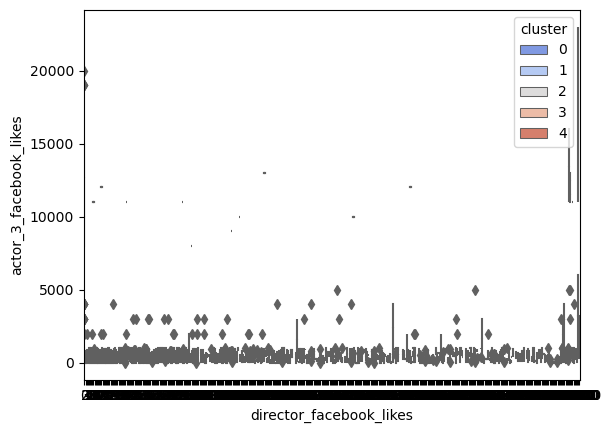

In [40]:
newdata['cluster'] = kmeans.labels_
sns.boxplot(x = 'director_facebook_likes',y ='actor_3_facebook_likes',data =newdata,hue='cluster', palette='coolwarm' )
plt.show()

#### Visualise the clusters with the help of lmplot grapgh

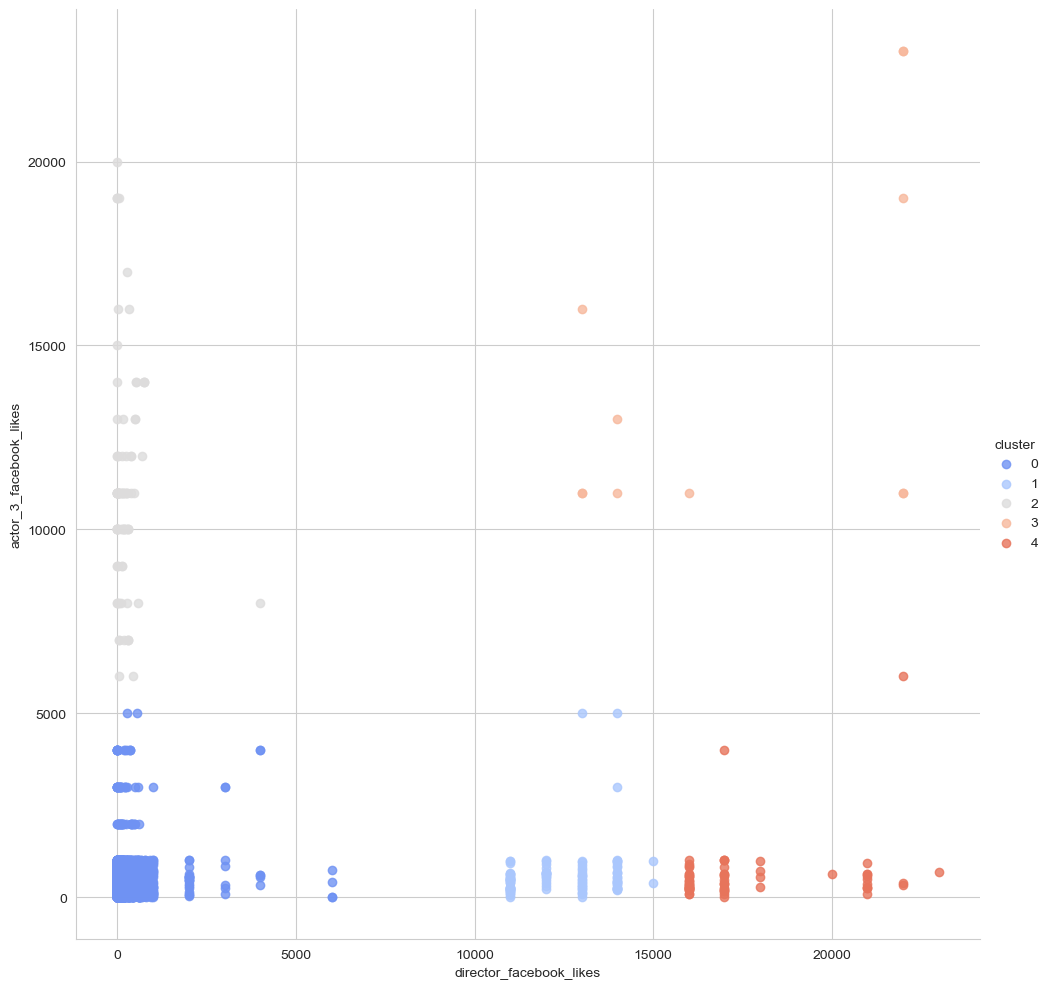

In [46]:
newdata['cluster'] =kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x='director_facebook_likes',y='actor_3_facebook_likes',data =newdata,hue='cluster',palette='coolwarm',height=10,aspect=1,fit_reg=False,scatter=True)
plt.show()

#### Cluster = 8

{0: 3147, 1: 81, 2: 68, 3: 11, 4: 78, 5: 19, 6: 15, 7: 1624}


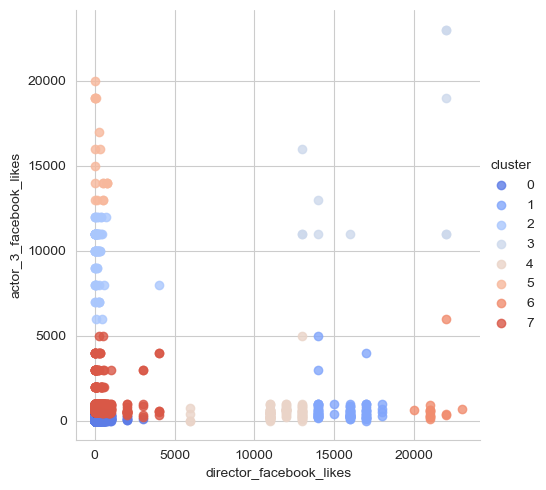

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8)
kmeans.fit(newdata)
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))
newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x= 'director_facebook_likes',y = 'actor_3_facebook_likes',data=newdata, hue='cluster',
           palette='coolwarm',height=5,aspect=1,fit_reg=False)
plt.show()



In [54]:
unique, counts = np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique, counts)))

{0: 3147, 1: 81, 2: 68, 3: 11, 4: 78, 5: 19, 6: 15, 7: 1624}
